<a href="https://colab.research.google.com/github/dablro12/AI_study/blob/main/HW2_voice_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#google drive <-> colab mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#import module
from pydub import AudioSegment
import numpy as np
import glob #모든 파일을 가지고 오기 위함

# 특정 개수씩 가져올 수 있는 data loader 

In [147]:
PATH = '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/HW2/4조_Training data set/'
mm_PATH = PATH+'남자 -남자목소리-samples/'
mw_PATH = PATH+'남자 -여자목소리-samples/'
ww_PATH = PATH+'여자 -여자목소리-samples/'
wm_PATH = PATH+'여자 -남자목소리-samples/'
animal_PATH = PATH+"동물소리(고라니 및 산비둘기)-samples/"

mm_dataset = glob.glob(mm_PATH+"*.webm")

train_ds = {
    'mm_dataset' : glob.glob(mm_PATH+"*.webm"),
    'mw_dataset' : glob.glob(mw_PATH+"*.webm"),
    'ww_dataset' : glob.glob(ww_PATH+"*.webm"),
    'wm_dataset' : glob.glob(wm_PATH+"*.webm"),
    'animal_dataset' : glob.glob(animal_PATH+"*.webm"),
    
}
train_ds['mm_dataset']

['/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/HW2/4조_Training data set/남자 -남자목소리-samples/sample-3.webm',
 '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/HW2/4조_Training data set/남자 -남자목소리-samples/sample-2.webm',
 '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/HW2/4조_Training data set/남자 -남자목소리-samples/sample-1.webm',
 '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/HW2/4조_Training data set/남자 -남자목소리-samples/sample-4.webm']

In [148]:
# 특정 개수 가져오기
def dataloader(cnt, ds_dict):
  dataset = list()
  for key, value in ds_dict.items():
    idx = 1
    for file in value:
      if idx < cnt+1:
         #print(file)
         dataset.append(AudioSegment.from_file(file, format='webm'))   
      else:
        continue
      idx += 1
  
  yield dataset

In [149]:
abstract_num = 2 #각 클래스별 추출할 파일 개수 지정
abstract_ds = dataloader(abstract_num, train_ds)
#print(type(abstract_ds))
#print(len(abstract_ds))
abstract_ds 

<generator object dataloader at 0x7fd8bf5de900>

## generator 만들고 소리재생 및 plot


[<pydub.audio_segment.AudioSegment object at 0x7fd8c8263640>, <pydub.audio_segment.AudioSegment object at 0x7fd8c7f03d90>, <pydub.audio_segment.AudioSegment object at 0x7fd8bf4b5f10>, <pydub.audio_segment.AudioSegment object at 0x7fd8bf4b5b80>, <pydub.audio_segment.AudioSegment object at 0x7fd8c8259880>, <pydub.audio_segment.AudioSegment object at 0x7fd8bf49ff10>, <pydub.audio_segment.AudioSegment object at 0x7fd8bf49f070>, <pydub.audio_segment.AudioSegment object at 0x7fd8c7e31eb0>, <pydub.audio_segment.AudioSegment object at 0x7fd8c7e31880>, <pydub.audio_segment.AudioSegment object at 0x7fd8c7e31bb0>]
data shape : (109440,), data array내의 최대값 : 2147483647


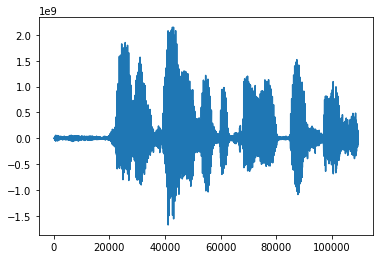

data shape : (109440,), data array내의 최대값 : 1734646272


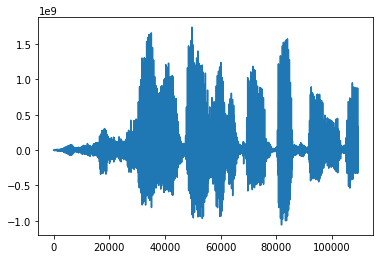

data shape : (106560,), data array내의 최대값 : 2147483647


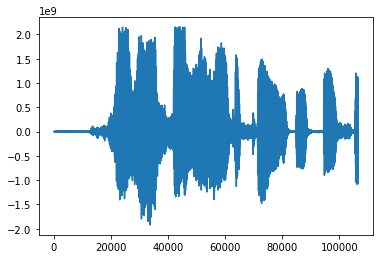

data shape : (106560,), data array내의 최대값 : 1388945920


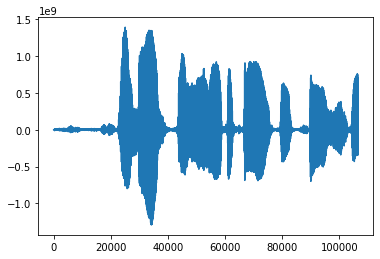

data shape : (103680,), data array내의 최대값 : 1028726272


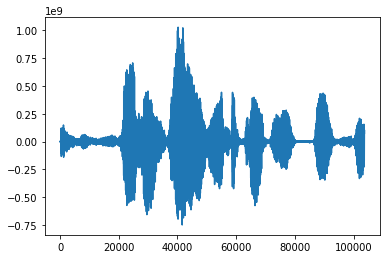

data shape : (106560,), data array내의 최대값 : 1045186880


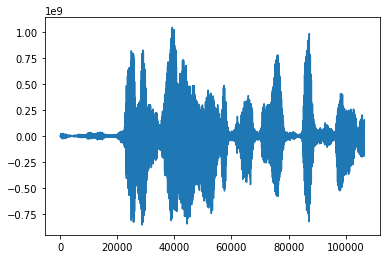

data shape : (106560,), data array내의 최대값 : 1231702528


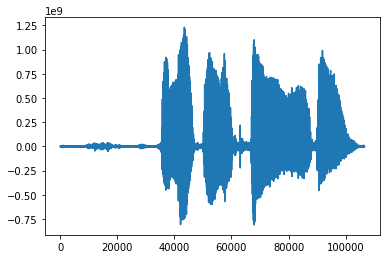

data shape : (106560,), data array내의 최대값 : 983304768


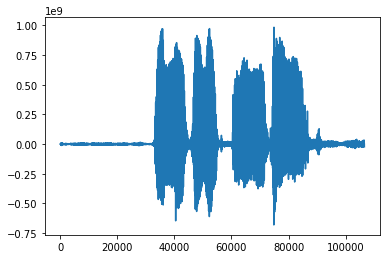

data shape : (106560,), data array내의 최대값 : 381955552


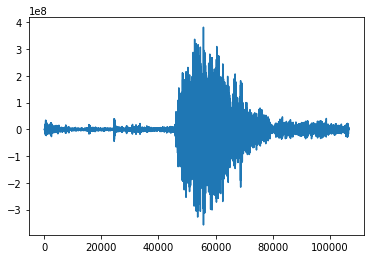

data shape : (106560,), data array내의 최대값 : 573861184


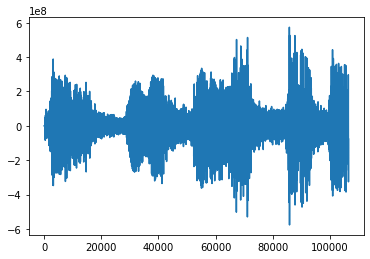

In [150]:
#파형 확인 및 소리 재생
from IPython.display import Audio #소리 재생 메소드 Audio(data, rate = {array에서 사용할 떄 필요}) 가져오기
import numpy as np
import matplotlib.pyplot as plt 

##client setting
#class_idx = 3 #class index (0~4 범위) 내로 임의 지정
#webm_idx = 1 #리스트 내의webm_idx(소리재생할 파일의 주소) 범위(0~abstract_num-1) 내로 임의 지정

for file_li in abstract_ds:
  print(file_li)

  for webm_file in file_li: 
    data = np.array(webm_file.get_array_of_samples())
    print(f"data shape : {data.shape}, data array내의 최대값 : {np.max(data)}")
      
    #plot
    plt.plot(data)
    plt.show()

In [153]:
Audio(data, rate =48000) 

# 다르게도 해보기 def - return 을 이용해 이중리스트로 파일을 만들어 관리

In [ ]:
# 특정 개수 가져오기
dataset = list()
def dataloader(cnt, ds_dict):
  for key, value in ds_dict.items():
    idx = 1
    tmp_ds = list()
    for file in value:
      if idx < cnt+1:
         #print(file)
         tmp_ds.append(AudioSegment.from_file(file, format='webm'))   
      else:
        continue
      idx += 1
    dataset.append(tmp_ds)
    
  return dataset

abstract_num = 2 #각 클래스별 추출할 파일 개수 지정
abstract_ds = dataloader(abstract_num, train_ds)
#print(type(abstract_ds))
#print(len(abstract_ds))
abstract_ds

* class_idx

0 : 남자 -남자목소리

1 : 남자 -여자목소리

2 : 여자 -여자목소리

3 : 여자 -남자목소리

4 : 고라니 - 울음소리

In [ ]:
#파형 확인 및 소리 재생
from IPython.display import Audio #소리 재생 메소드 Audio(data, rate = {array에서 사용할 떄 필요}) 가져오기
import numpy as np
import matplotlib.pyplot as plt 

##client setting
class_idx = 3 #class index (0~4 범위) 내로 임의 지정
webm_idx = 1 #리스트 내의webm_idx(소리재생할 파일의 주소) 범위(0~abstract_num-1) 내로 임의 지정

##data plot
data = np.array(abstract_ds[class_idx][webm_idx].get_array_of_samples())
print(f"data shape : {data.shape}, data array내의 최대값 : {np.max(data)}")
print(data)
print(type(data))

plt.plot(data)
plt.show()
#data = data[::6] / np.max(np.abs(data[::6]))
#print(f"data shape : {data.shape}, data array내의 최대값 : {np.max(data)}")



##play Audio
Audio(data, rate = 48000) #여자 -남자목소리 중 첫 번쨰 파일 소리 확인
     

# 아래는 eclass에 게시된 코드

In [59]:
data_path ='/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/HW2/4조_Training data set/남자 -남자목소리-samples/'

mm = AudioSegment.from_file(data_path+"sample-1.webm", format='webm')
print(mm)
mm

In [86]:
data = np.array(mm.get_array_of_samples())
print(data.shape)
print(np.max(data))
print(data)
print(type(data))

(106560,)
1649989120
[      -3      -33     -110 ... 14388023 11528990  9303116]
<class 'numpy.ndarray'>


In [10]:
#음성데이터 파형으로 확인
import matplotlib.pyplot as plt

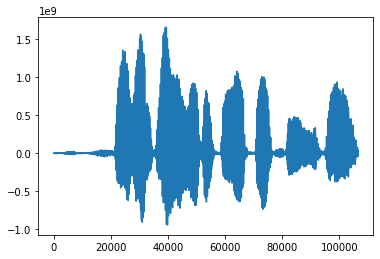

In [11]:
plt.plot(data)
plt.show()

In [17]:
#음성데이터 소리로 확인
from IPython.display import Audio

In [18]:
# Audio(data, rate = {frequency [Hz]})
Audio(data,rate=48000) #48000Hz로 표현된 소리

In [16]:
Audio(data,rate=48000/3) #3배 stretched 된 소리 6초 재생

In [22]:
Audio(data, rate= 100000) #높은 소리로 나타내는 소리 1초 재생